In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [2]:
# Define base distribution

normal =tfd.Normal(loc=0. , scale=1. )

In [5]:
# Sample from base distribution
n=1000
z=normal.sample(n)


### Scale and shift bijector

In [6]:
# Define scale and shift

scale = 4.5
shift = 7

In [7]:
# Define chain bijector
scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])


In [11]:
# We can also use call methods
scale_transf = tfb.Scale(scale)
shift_transf =tfb.Shift(shift)
scale_and_shift =shift_transf(scale_transf)

In [14]:
# Apply the forward transformation
x = scale_and_shift.forward(z)


In [15]:
# Check the forward transformation

tf.norm(x - (scale*z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

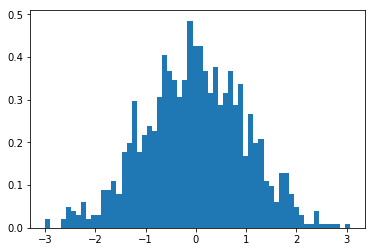

In [16]:
# Plot z density
plt.hist(z,bins=60, density=True)
plt.show()


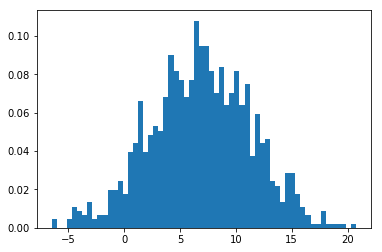

In [17]:
# Plot x density
plt.hist(x,bins=60, density=True)
plt.show()


#### Inverse transformation

In [20]:
# Apply inverse transformation

inv_x =scale_and_shift.inverse(x)

In [21]:
# Check inverse transformation
tf.norm(inv_x -z)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [26]:
# Compute log prob for x
log_prob_x =normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-2.4648638 -3.7404335 -2.785661  -5.8400083 -2.4255955 -2.5267243
 -2.479296  -2.969538  -3.0296926 -3.198982  -2.614206  -2.5980413
 -2.4886541 -3.0507798 -3.0768254 -2.42664   -3.2015855 -2.6195097
 -2.4536338 -2.423461  -3.49954   -2.884878  -2.4258943 -2.6139784
 -2.4711957 -2.9205909 -2.5937119 -2.4290938 -3.0062652 -2.5599647
 -2.5114965 -2.8179295 -4.2837715 -2.4535217 -2.724368  -3.3320804
 -3.2785215 -4.1420026 -2.6721048 -2.7007818 -2.4235346 -2.5655642
 -2.4335053 -2.6202219 -2.4588206 -2.4262078 -2.70613   -2.4267955
 -7.107691  -2.7198648 -2.437397  -3.2714186 -2.4489498 -2.5057948
 -2.4237034 -2.5417457 -2.6885517 -2.4246027 -2.4928057 -4.2521257
 -2.4832065 -2.6630569 -3.8591459 -3.4288712 -2.787479  -3.243133
 -4.0391507 -2.4317727 -6.813576  -2.7761748 -3.077102  -2.4272368
 -2.5771163 -2.6415071 -2.931425  -2.545271  -2.6106467 -3.0539093
 -3.520019  -2.4395971 -2.6843274 -3.2193785 -2.423028  -2.4377449
 -2.4234872 -2.8345053 -3.175103  -2.5064912 -2.5220

In [30]:
# We can also use the inverse transformation

log_prob_X = (normal.log_prob(scale_and_shift.inverse(x)+scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0)))
print(log_prob_X)

tf.Tensor(
[ -1.6567782   -5.8089256   -1.1317761   -1.5351125   -2.1606758
  -1.4687687   -2.610961    -4.169079    -4.3135157   -4.699757
  -3.171328    -3.114977    -1.5707431   -4.363151    -0.9839424
  -1.9256337   -4.705501    -3.189444    -2.4528766   -2.0056334
  -0.91961384  -1.0663477   -2.16706     -1.3115046   -2.5651367
  -4.0480633   -3.0995722   -2.22197     -1.00884     -1.3998497
  -2.7712598   -3.7816834   -1.0092698   -1.7090536   -1.1837392
  -0.93105936  -4.872987    -6.5578756   -1.2375485   -1.2067797
  -2.099021    -2.9957051   -1.8427014   -3.191863    -1.683378
  -2.173426    -1.2013867   -2.1846104   -2.130848    -1.1879935
  -1.809361    -4.857699    -1.7334507   -1.5208511   -2.1065247
  -2.9017272   -1.2195076   -1.9669166   -2.6817815   -1.0024031
  -1.5883992   -1.2479596   -6.0352645   -5.1892233   -1.1303874
  -4.7964764   -0.9620901   -2.2578673  -10.897649    -3.6672893
  -4.424443    -2.1924763   -3.039164    -1.2742894   -4.075145
  -1.4285827   -3

### Broadcasting

In [31]:
x = tf.random.normal(shape=(100, 1))

In [33]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature = 0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [34]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.2,1])
y = softfloor.forward(x)
print(y.shape)
                        

(100, 2)


In [37]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.1,0.1, 1])
y = softfloor.forward(x)
print(y.shape)
               

(100, 3)


In [38]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

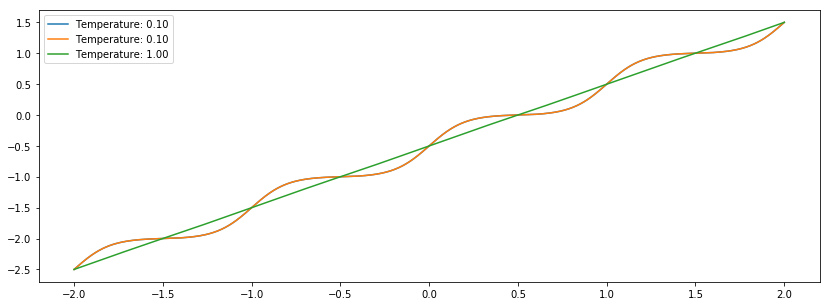

In [41]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor, ['temperature'], x)

In [42]:
# Gumbel bijector using broadcasting

exp = tfb.GumbelCDF(loc=[0.5, 1,1.5, 2, 3], scale = [1,2,3,4,5])

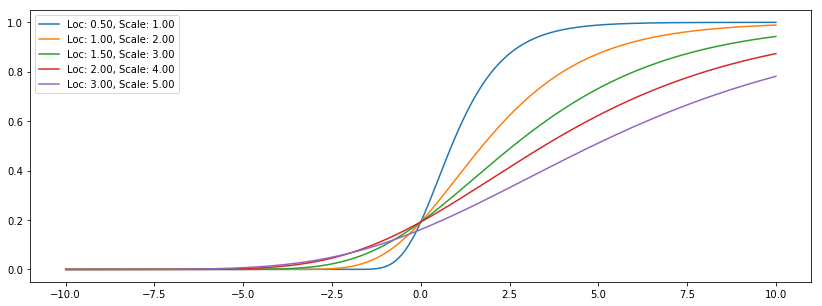

In [45]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5,exp, ['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [3]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [4]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [5]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [6]:
# Exponential bijector

exp = tfb.Exp()

In [7]:
# Log normal transformed distribution using exp and normal bijectors
log_normal_td = exp(normal)


In [9]:
# Display event and batch shape

print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [11]:
# Base distribution
z = normal.sample(n)
z


<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-0.31125325, -0.2909353 , -0.8036596 , ...,  0.6092533 ,
       -0.3465371 ,  0.08131997], dtype=float32)>

#### Plots

<function matplotlib.pyplot.show(*args, **kw)>

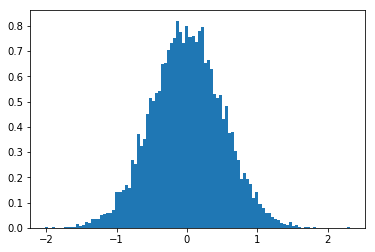

In [12]:
# Plot z density

plt.hist(z, bins=100, density=True)
plt.show

In [13]:
# Transformed distribution
x = log_normal_td.sample(n)

<function matplotlib.pyplot.show(*args, **kw)>

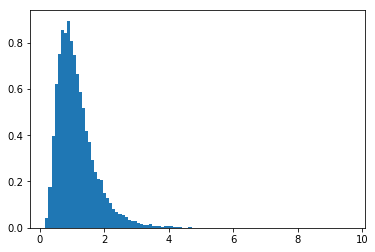

In [14]:
# Plot x density
plt.hist(x, bins=100, density=True)
plt.show


In [15]:
# Define log normal distribution

log_normal = tfd.LogNormal(loc=loc, scale=scale)

In [18]:
# Sample log_normal

l=log_normal.sample(n)

<function matplotlib.pyplot.show(*args, **kw)>

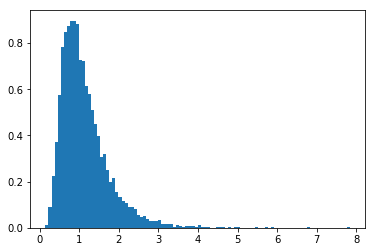

In [19]:
# Plot l density
plt.hist(l, bins=100, density=True)
plt.show


#### Log probability

In [21]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(x)

In [22]:
# Log prob of log normal transformed distribution
log_prob_td = log_normal_td.log_prob(x)


In [23]:
# Check log probs
tf.norm(log_prob -log_prob_td)


<tf.Tensor: shape=(), dtype=float32, numpy=6.921184e-06>

### Event shape and batch shape

In [26]:
# Set a scaling lower triangular matrix

tril = tf.random.normal((2,4,4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)

In [27]:
# View of scale_low_tri
scale_low_tri.to_dense()


<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-8.3125651e-02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-4.9296948e-01,  4.2944202e-01,  0.0000000e+00,  0.0000000e+00],
        [ 8.0794555e-01,  1.1599696e-01,  4.5730963e-01,  0.0000000e+00],
        [-1.7856005e+00, -9.2928487e-01,  4.5963123e-01, -4.4336173e-01]],

       [[-2.2158110e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.0427009e+00,  1.5327667e-01,  0.0000000e+00,  0.0000000e+00],
        [ 1.0654601e+00, -1.0955522e+00,  1.5443114e+00,  0.0000000e+00],
        [-2.2323821e+00,  1.3966281e-03, -2.8746909e-01, -1.6701594e-01]]],
      dtype=float32)>

In [28]:
# Define scale linear operator
scale_lin_op =tfb.ScaleMatvecLinearOperator(scale_low_tri)

In [32]:
# Define scale linear operator transformed distribution with a batch and event shape
mvn = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape=[2], event_shape=[4])

In [34]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [39]:
# Sample
y1 = mvn.sample(sample_shape=(n,))
print(y1.shape)

(10000, 2, 4)


In [41]:
# Define a MultivariateNormalLinearOperator distribution

mvn2 = tfd.MultivariateNormalLinearOperator(loc =loc, scale=scale_low_tri)

In [45]:
# Display event and batch shape
print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)


batch shape:  (2,)
event shape:  (4,)


In [46]:
# Sample
y2=mvn2.sample(sample_sahpe=(n,))
print(y2.shape)


(2, 4)


In [50]:
# Check

xn = normal.sample((n, 2, 4))
tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)) / tf.norm(mvn.log_prob(xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7500125>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [7]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
        
    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        return tf.squeeze(tf.pow(self.a * x + self.b, 3))
    
    def _inverse(self,y):
        y = tf.cast(y, tf.float32)
        return (tf.math.sign(y) * tf.pow(tf.abs(y), 1/3) - self.b)/self.a
    
    def _forward_log_det_jacobian(self, x):
        x =tf.cast(x, tf.float32)
        return tf.math.log(3. * tf.abs(self.a)) + 2. *tf.math.log (tf.abs(self.a*x+self.b))
    

In [8]:
# Cubic bijector
cubic = Cubic([1.0, -2.0], [-1.0,0.4], validate_args = True)


In [9]:
# Apply forward transformation

x = tf.constant([[1, 2], [3, 4]])
y = cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [10]:
# Check inverse
np.linalg.norm(x - cubic.inverse(y))


0.0

#### Function plots

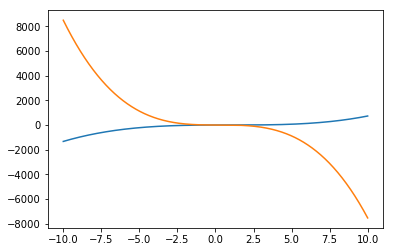

In [15]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x, cubic.forward(x))

In [16]:
# Display shape
print(cubic.forward(x).shape)

(500, 2)


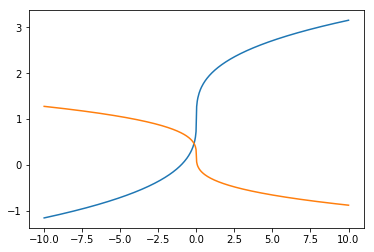

In [17]:
# Plot the inverse

plt.plot(x, cubic.inverse(x))

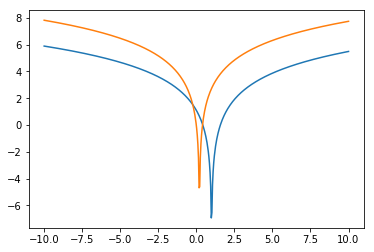

In [18]:
# Plot the forward log Jacobian determinant
plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))


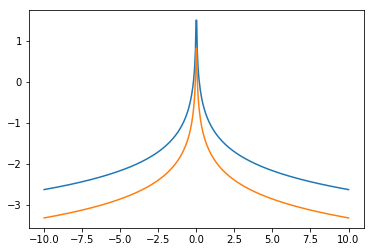

In [19]:
# Plot the inverse log Jacobian determinant

plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))

#### TransformedDistribution and plots

In [20]:
# Create a transformed distribution with Cubic
normal = tfd.Normal(loc = 0,  scale =1)
cubed_normal =tfd.TransformedDistribution(normal, cubic, event_shape=[2])

In [22]:
# Sample cubed_normal

n = 100
g = cubed_normal.sample(n)
g.shape

TensorShape([100, 2])

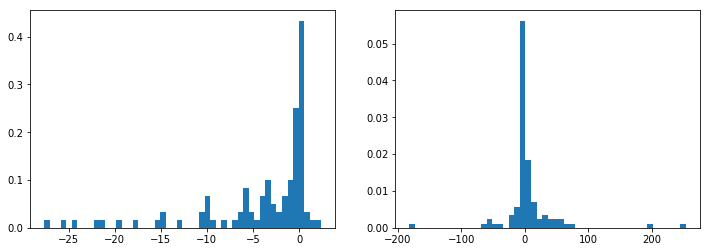

In [23]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

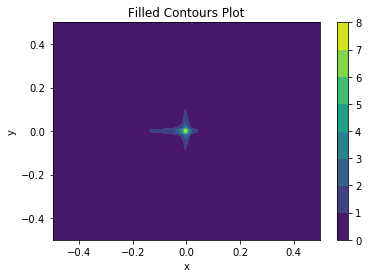

In [24]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [25]:
# Create a transformed distribution with the inverse of Cube

inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal = inverse_cubic(normal, event_shape=[2])

In [26]:
# Samble inv_cubed_normal
n=100
g=inv_cubed_normal.sample(n)
g.shape


TensorShape([100, 2])

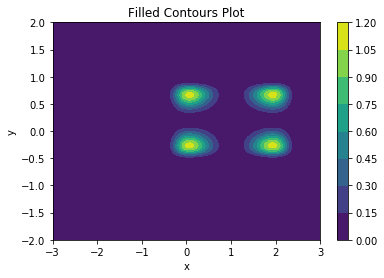

In [27]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

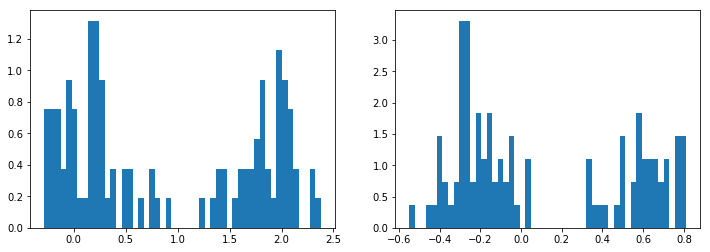

In [28]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [35]:
# Create a mixture of four Gaussians
probs = [0.45, 0.55]
mix_gauss = tfd.Mixture(
    cat = tfd.Categorical(probs=probs),
    components = [tfd.Normal(loc=2.3, scale=0.4), tfd.Normal(loc=0.8,scale= 0.4)
    ])


In [36]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


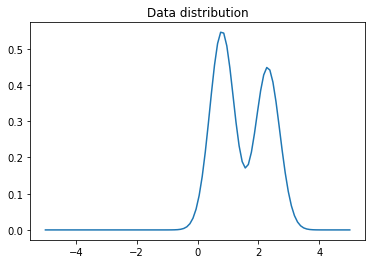

In [37]:
# Plot the data distribution

x = np.linspace(-5.0, 5.0, 100)
plt.plot(x, mix_gauss.prob(x))
plt.title('Data distribution')
plt.show()

In [38]:
# Make a trainable bijector

trainable_inv_cubic = tfb.Invert(Cubic (tf.Variable(0.25), tf.Variable(-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [39]:
# Make a trainable transformed distribution

trainable_dist =tfd.TransformedDistribution(normal, trainable_inv_cubic)

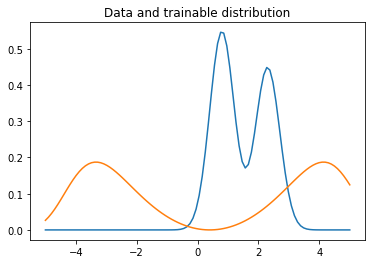

In [43]:
# Plot the data and learned distributions

x = np.linspace(-5.0, 5.0, 100)
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label= 'trainable')
plt.title('Data and trainable distribution')
plt.show()

In [51]:
# Train the bijector

num_epochs = 30
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...
Epoch 20...
Epoch 21...
Epoch 22...
Epoch 23...
Epoch 24...
Epoch 25...
Epoch 26...
Epoch 27...
Epoch 28...
Epoch 29...


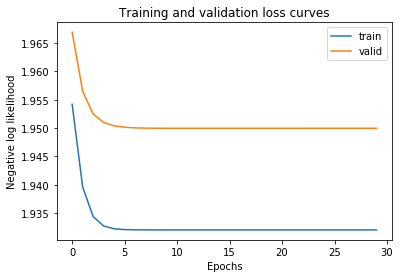

In [52]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

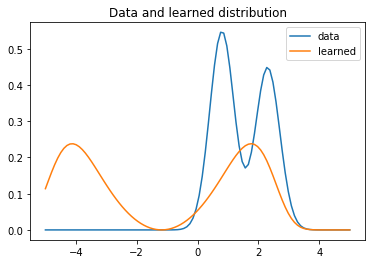

In [53]:
# Plot the data and learned distributions

x = np.linspace(-5.0, 5.0, 100)
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label= 'learned')
plt.legend()
plt.title('Data and learned distribution')
plt.show()

In [47]:
# Display trainable variables
trainable_inv_cubic.trainable_variables


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4770582>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.0120793795>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [22]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2, 2)

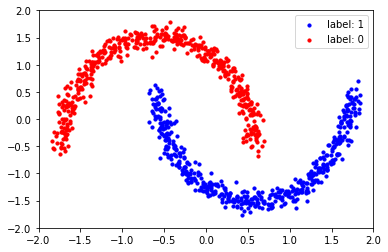

In [23]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [24]:
# Define base distribution
base_distribution = tfd.Normal(loc=0, scale=1)


In [25]:
# Define the trainable distribution
def make_masked_autoregressive_flow(hidden_units =[16,16], activation = 'relu'):
        made= tfb.AutoregressiveNetwork(
        params=2, event_shape=[2], hidden_units=hidden_units, activation=activation)
        #logging.set_verbosity(logging.ERROR)
        return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn =made)
trainable_distribution =tfd.TransformedDistribution(base_distribution,
                                                   make_masked_autoregressive_flow(),
                                                    event_shape = [2]
                                                   )


In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [28]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

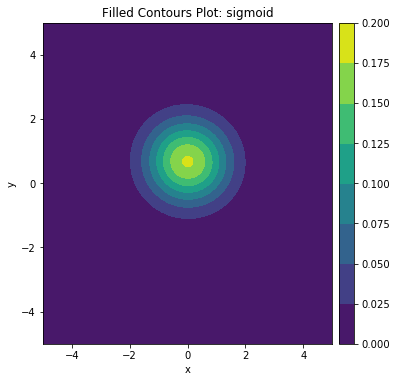

In [29]:
# Plot contour
activation  = 'sigmoid'
maf = tfd.TransformedDistribution(base_distribution,
                                 make_masked_autoregressive_flow(activation=activation), event_shape =[2])
plot_contour_prob([maf], scale_fig=6, title=[activation])


In [30]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [38]:
# Make samples
x =  base_distribution.sample((1000,2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

In [39]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

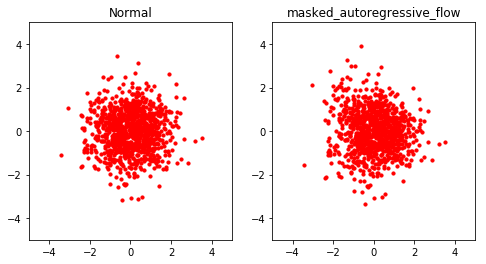

In [40]:
# Plot
_plot(samples)


#### Training a MaskedAutoregressiveFlow bijector

In [41]:
from tensorflow.keras.callbacks import LambdaCallback

In [42]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [44]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=600, n_disp=60 )


 Epoch 1/600 
	 loss: 2.8198, val_loss: 2.7958

 Epoch 61/600 
	 loss: 2.6840, val_loss: 2.6592

 Epoch 121/600 
	 loss: 2.6441, val_loss: 2.6204

 Epoch 181/600 
	 loss: 2.5961, val_loss: 2.5739

 Epoch 241/600 
	 loss: 2.5012, val_loss: 2.4862

 Epoch 301/600 
	 loss: 2.3005, val_loss: 2.3275

 Epoch 361/600 
	 loss: 2.2019, val_loss: 2.2317

 Epoch 421/600 
	 loss: 2.1524, val_loss: 2.1835

 Epoch 481/600 
	 loss: 2.1135, val_loss: 2.1465

 Epoch 541/600 
	 loss: 2.0809, val_loss: 2.1181


In [45]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

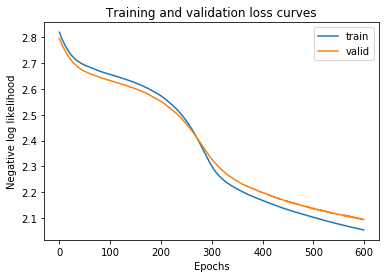

In [46]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [49]:
# Make samples

x =  base_distribution.sample((1000,2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

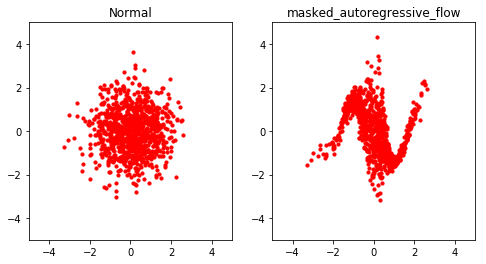

In [51]:
# Plot
_plot(samples)


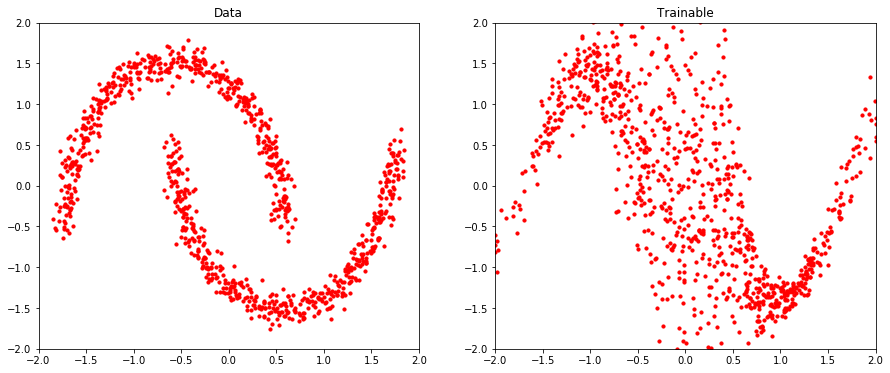

In [52]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

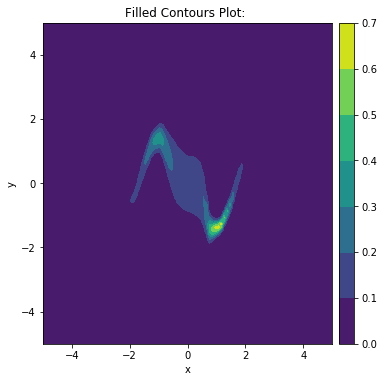

In [53]:
# Plot contour

plot_contour_prob([trainable_distribution], scale_fig=6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [55]:
# Define a more expressive model
num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
    masked_auto_i = make_masked_autoregressive_flow(hidden_units=[256, 256], activation ='relu'
                                                   )
    bijectors.append(masked_auto_i)
    bijectors.append(tfb.Permute(permutation=[1, 0]))

flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))


In [56]:
# Define the trainable distribution
trainable_distribution =tfd.TransformedDistribution(distribution=base_distribution, 
                                                   bijector= flow_bijector,
                                                   event_shape =[2])


In [57]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

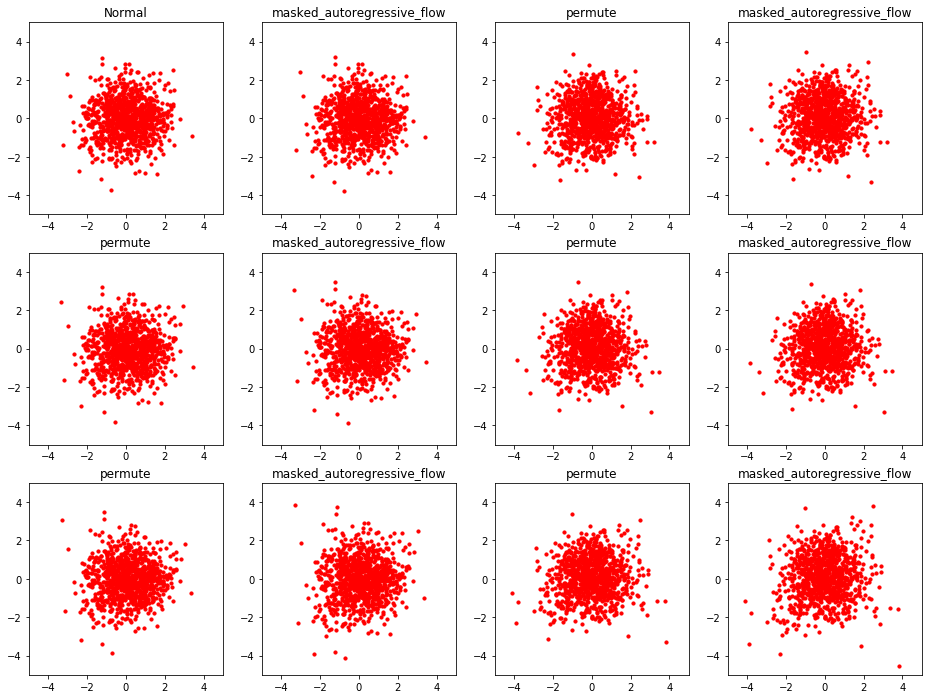

In [58]:
# Plot

_plot(samples, 3)

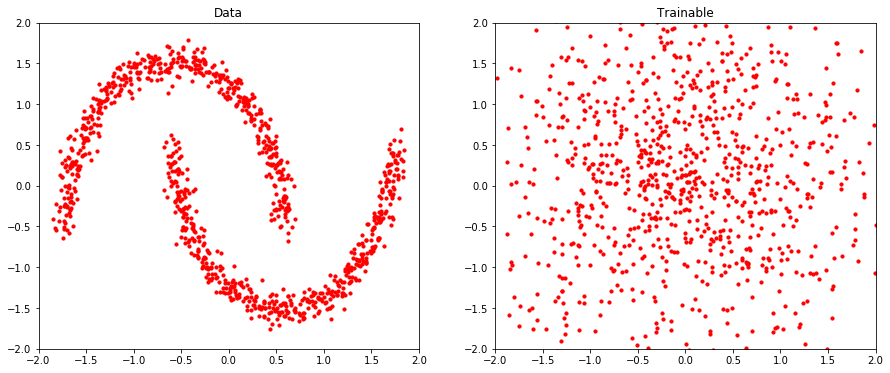

In [59]:
# Plot

visualize_training_data(samples)

In [60]:
# Train the distribution

history  = train_dist_routine(trainable_distribution, n_epochs=600, n_disp=50)


 Epoch 1/600 
	 loss: 2.9085, val_loss: 2.6607

 Epoch 51/600 
	 loss: 2.1197, val_loss: 2.2113

 Epoch 101/600 
	 loss: 2.0771, val_loss: 2.0690

 Epoch 151/600 
	 loss: 2.0012, val_loss: 2.0422

 Epoch 201/600 
	 loss: 1.8671, val_loss: 1.9020

 Epoch 251/600 
	 loss: 1.9106, val_loss: 1.8513

 Epoch 301/600 
	 loss: 1.7620, val_loss: 1.7805

 Epoch 351/600 
	 loss: 1.5871, val_loss: 1.5559

 Epoch 401/600 
	 loss: 1.4041, val_loss: 1.4121

 Epoch 451/600 
	 loss: 1.2405, val_loss: 1.3241

 Epoch 501/600 
	 loss: 1.1562, val_loss: 1.3300

 Epoch 551/600 
	 loss: 1.1243, val_loss: 1.3614


In [61]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

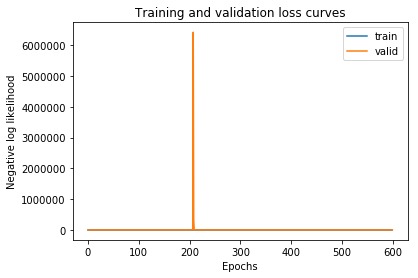

In [62]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

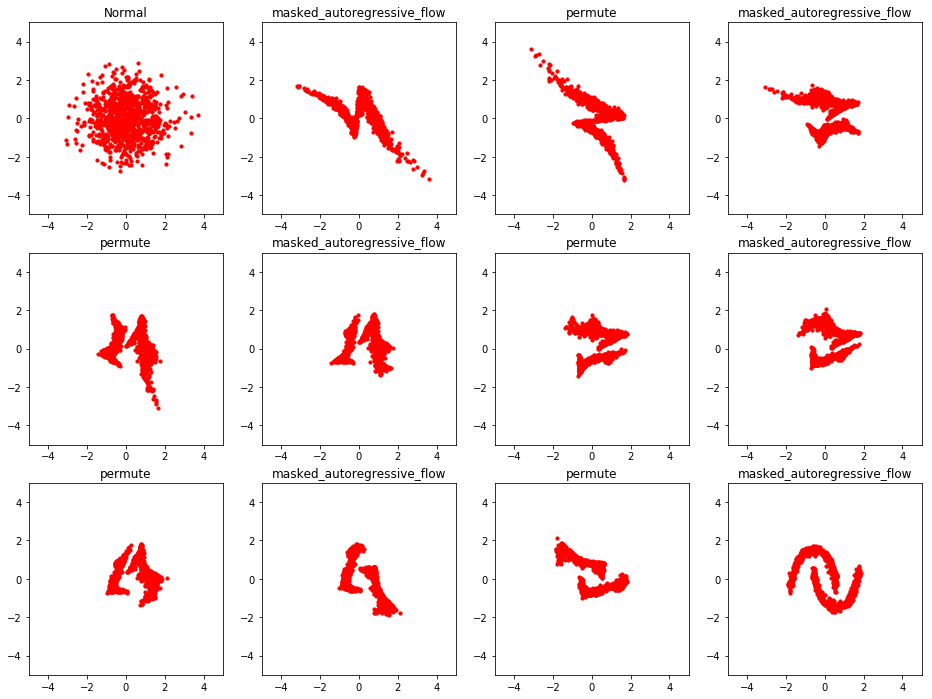

In [63]:
# Make samples and plot

names, samples = make_samples()
_plot(samples, 3)

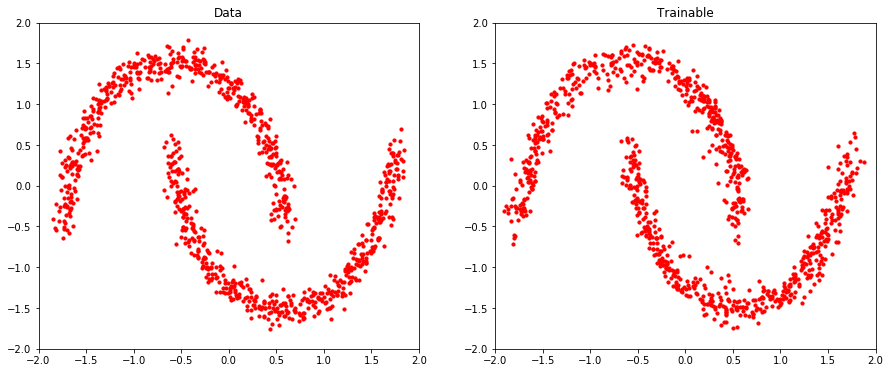

In [64]:
# Plot

visualize_training_data(samples)

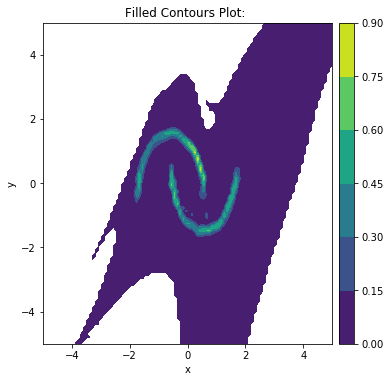

In [65]:
# Plot
plot_contour_prob([trainable_distribution], scale_fig =6)
